In [1]:
import numpy as np
import scipy.stats as stats

In [2]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data_dir="C:/Users/tsb7592/Box/Participant app - timing test results"
os.chdir(data_dir)

# Compute the Total response time in minutes

In [3]:
ass ={'Assessment 1':'Assessment 6', 'Assessment 2':'Assessment 7', 'Assessment 3':'Assessment 8', 'Assessment 4':'Assessment 9', 'Assessment 5':'Assessment 10'}

In [4]:
# get all the Assesement Data

all_files = glob.glob('C:/Users/tsb7592/Box/Participant app - timing test results/*Assessment Data*.csv')
doc =[]
for file in all_files:
    if 'Narrow Structure' in file or 'Odessa' in file:
        continue
    else:
        data = pd.read_csv(file)
        print(file)
        if 'Stacy' in file:
            data['PIN'] ='Stacy'
            data['Assessment Name'] = data['Assessment Name'].str.replace('Prod|Partic','Assessment')
        else:
            data['PIN'] ='Andrey'
            data['Assessment Name']=data['Assessment Name'].map(ass)
            
        if 'Remote' in file:
            data['Mode'] ='Remote'
        else:
            data['Mode']='In Person'
        doc.append(data)

df = pd.concat(doc)

C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-21 08.58.42 Assessment Data - Prod 4300 (Stacy).csv
C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-22 13.19.11 Assessment Data - Remote Apps 1.23.4782 (Stacy).csv
C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-22 17.50.39 Assessment Data (PROD- Andrey).csv
C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-22 19.33.02 Assessment Data (Remote - Andrey).csv


In [5]:
#Set two decimal points for display
pd.options.display.float_format = "{:.2f}".format

In [6]:
#Drop the practice
df=df[df.Inst!='NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ Practice v2.1']

In [7]:
df.groupby(['PIN','Mode','Assessment Name','Inst'])['ResponseTime'].count()

PIN     Mode       Assessment Name  Inst                                                                  
Andrey  In Person  Assessment 10    NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1    24
                                    NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1          61
                   Assessment 6     NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1    24
                                    NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1          61
                   Assessment 7     NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1    24
                                    NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1          61
                   Assessment 8     NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1    24
                                    NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1  

In [8]:
df['App Version'].value_counts()

1.23.4300                  848
1.23.4780 (Participant)    847
Name: App Version, dtype: int64

In [9]:
df['Mode'].value_counts()

In Person    848
Remote       847
Name: Mode, dtype: int64

In [10]:
df.columns

Index(['PIN', 'DeviceID', 'Assessment Name', 'InstOrdr', 'InstSctn', 'ItmOrdr',
       'Inst', 'Locale', 'ItemID', 'Response', 'Score', 'Theta', 'TScore',
       'SE', 'DataType', 'Position', 'ResponseTime', 'DateCreated',
       'InstStarted', 'InstEnded', 'App Version', 'iPad Version',
       'Firmware Version', 'Mode'],
      dtype='object')

In [11]:
#Convert to datetime
df['InstStarted']= pd.to_datetime(df['InstStarted'])
df['InstEnded']= pd.to_datetime(df['InstEnded'])
df['DateCreated']= pd.to_datetime(df['DateCreated'])

In [12]:
df.Inst.unique()

array(['NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1'],
      dtype=object)

In [13]:
df.ResponseTime.describe()

count   1695.00
mean       1.48
std        0.59
min        0.12
25%        1.34
50%        1.42
75%        1.60
max       19.36
Name: ResponseTime, dtype: float64

In [14]:
def select_inst(df, select):
    sdata = df.set_index('Inst').filter(like=select, axis=0)
    data= sdata[['PIN','Mode','Assessment Name','ItemID','DateCreated','ResponseTime']]
    return data

In [15]:
def save_median_mean(df, var= 'ResponseTime'):
    '''
    Save the median and mean as a new column under Type for selected var
    '''
    mni = df.groupby('ItemID')[var].mean().reset_index()
    mni['Type'] = 'mean'
    mne = df.groupby('ItemID')[var].median().reset_index()
    mne['Type'] = 'median'
    rv = mni.append(mne, ignore_index=True)
    return rv

# Plots
where the y-axis is the ResponseTime and the x-axis is the items (practice1, practice2 .. etc). Put lines through them so there are 10 horizontal lines (and dots for each item).

In [16]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
def draw_median_mean(sdata, meas, var='ResponseTime'):
    sns.set() #change style

    g=sns.scatterplot(data=sdata, x="ItemID", y=var,hue='Mode',  markers=True, dashes=False)
    g.set_title(meas+" (mean and median) by Item", fontsize=15)
    n=sdata['ItemID'].nunique()
    g.set_xticklabels(labels=range(n), rotation=30)
    g.legend (loc="upper right");
   

In [29]:
def draw_all(sdata, meas, var='ResponseTime'):
    sns.set() #change style
    # Create a visualization
    g=sns.relplot(data=sdata, x="ItemID", y="ResponseTime",hue='Assessment Name', style='Mode', height=8.27, aspect=11.7/8.27)
    g.fig.suptitle(meas+" ResponseTime vs ItemID by trial", fontsize=15)
    g.set_xticklabels(rotation=60)
    leg = g._legend

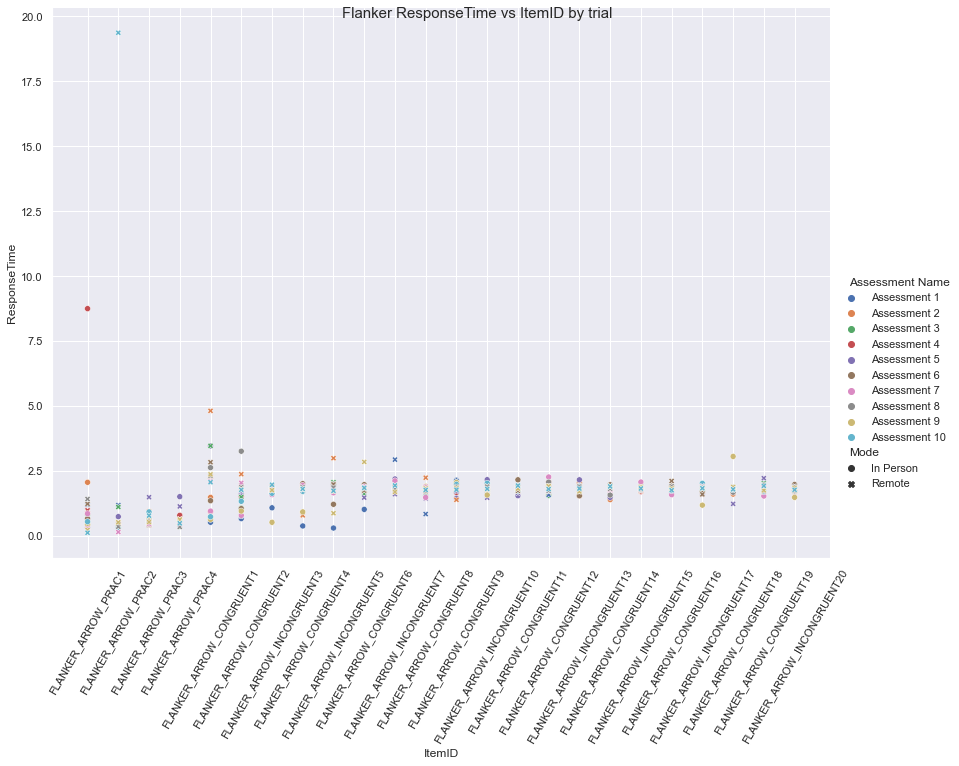

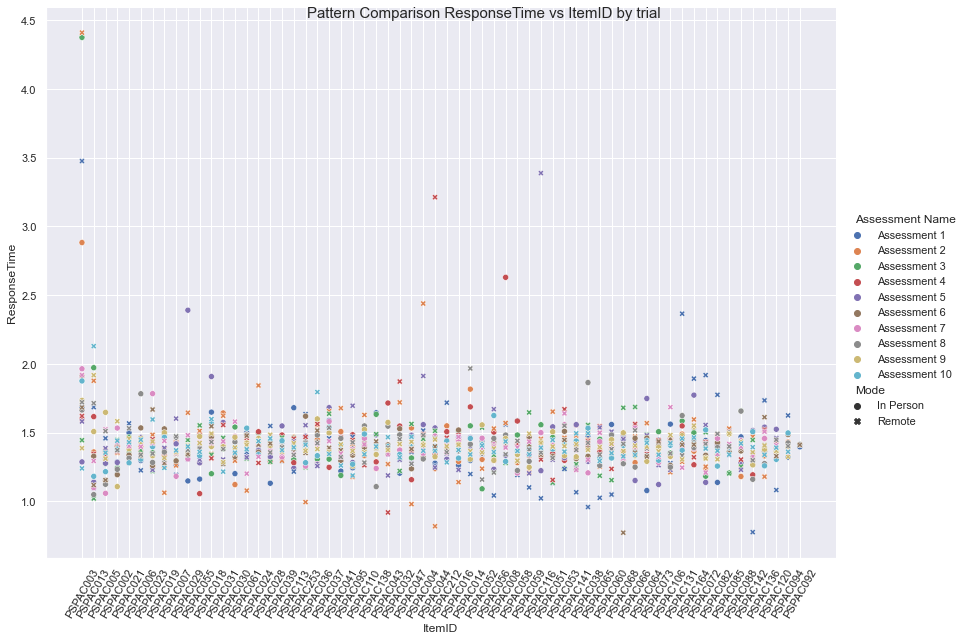

In [33]:
insts=['Flanker', 'Pattern Comparison']
bdf= {}

for item in insts:
    data = select_inst(df, item)
    draw_all(data, item)
    bdf[item] =data

In [31]:
df[['Response', 'ResponseTime']]

,Response,ResponseTime
0,2.00,0.32
1,2.00,0.32
2,1.00,0.42
3,2.00,0.54
4,1.00,0.52
...,...,...
466,1.00,1.75
467,1.00,1.83
468,2.00,1.79
469,1.00,1.92


# Regression

In [32]:
import statsmodels.api as sm

def Regress(df, exp=False):

    df['item'] = pd.factorize(df['ItemID'])[0]
    reg= df[['ResponseTime','item']]
    reg=reg.dropna()
    reg['intercept'] = 1.0
    y = np.array(reg['ResponseTime']).reshape(-1,1)
    X =reg.iloc[:,1:]
    ols_model = sm.OLS(y, X)
    ols_results = ols_model.fit()

    print(ols_results.summary())
    print('')
    print('')
    print('Exponential Results')
    exp_model = sm.OLS(np.exp(y), X)
    exp_results = exp_model.fit()
    print(exp_results.summary())
    print('')


In [39]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [51]:
import sys 

stdoutOrigin=sys.stdout 
sys.stdout = open("regression_results.txt", "w")

In [52]:
for inst in bdf:
    data= bdf[inst]
    prop = data[data['Mode']=='In Person']
    rm= data[data['Mode']!='In Person']
    print(inst+' In Person')
    Regress(prop)
    print(inst+' Remote')
    Regress(rm)

In [53]:
sys.stdout.close()
sys.stdout=stdoutOrigin

# Old code

In [27]:
def calculate_betweentime(data):
    new_ti=[]
    for pin in data.PIN.unique():
        subset=data[data['PIN']==pin]
        subset['BetweenItemTime']=subset['DateCreated'].diff()
        new_ti.append(subset)
        
    new =pd.concat(new_ti)
    new['ResponseTime']= pd.to_timedelta(new['ResponseTime'], unit='s', errors='coerce')
    new['BetweenItemTime']=round(new['BetweenItemTime'].dt.total_seconds(),2)
    new['ResponseTime']=round(new['ResponseTime'].dt.total_seconds(),2)

    return new

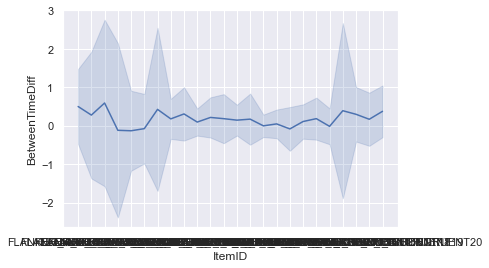

In [97]:
    g=sns.relplot(data=sdata, x="ItemID", y="ResponseTime",hue='Assessment Name', style='Mode',  markers=True)
    g.set_title(meas+" ResponseTime vs ItemID by trial", fontsize=15)
    n=sdata['ItemID'].nunique()
    g.set_xticklabels(labels=range(n), rotation=30)
    g.legend (loc="upper right");
    